In [385]:
def plot_decision_regions(X, y, classifier, resolution=0.01):
    from matplotlib.colors import ListedColormap
    # setup marker generator and color map
    markers = ('o', 'o', 'o', 'o', 'o')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # range
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    # grid of points
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    
    # evaluate the classifier at each grid point
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    
    # plot the regions
    plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], 
                    y=X[y == cl, 1],
                    alpha=0.3,
                    c=colors[idx],
                    marker=markers[idx], 
                    label='class '+str(cl), 
                    edgecolor='black')
    plt.legend()

In [369]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Random Forests

**Random Forest** is an **ensemble** of Decision Trees, trained via the **bagging** method.

The goal of **ensemble methods** is to combine the predictions of several classifiers.

<img src="images\ensemble.png" width=500 height=200 />

Once all classifiers are trained, the ensemble can make a prediction for a new instance by **aggregating** the predictions of all classifiers.

The ensemble **aggregates** the predictions of each classifier and predicts the class that gets the most votes.

<img src="images\aggregation.png" width=500 height=200 />

The decision trees are trained on different random subsets of the training set. 
When sampling is performed with replacement, this method is called **bagging** (short for bootstrap aggregating)

<img src="images\bagging.png" width=500 height=200 />

## Example: Random Forests vs Decision Trees

In [370]:
from sklearn.datasets import make_circles
X, y = make_circles(n_samples=500, factor=0.1, noise=.4)

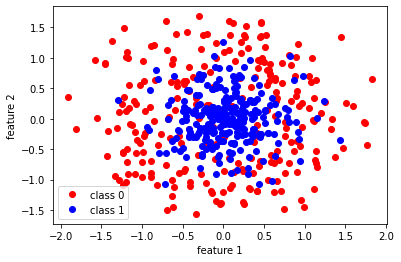

In [371]:
# plot the dataset: inner cirlce (class 1) + outer circle (class 0)
plt.plot(X[y==0,0],X[y==0,1],'ro', label='class 0')
plt.plot(X[y==1,0],X[y==1,1],'bo',label='class 1')
plt.xlabel('feature 1')
plt.ylabel('feature 2')
plt.legend()

In [372]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y)

### Decision Trees:

#### unlimited Max depth 

In [373]:
from sklearn.tree import DecisionTreeClassifier
tree_clf = DecisionTreeClassifier()
tree_clf.fit(X_train,y_train)

DecisionTreeClassifier()

In [374]:
from sklearn.metrics import accuracy_score

In [375]:
y_train_pred = tree_clf.predict(X_train)
accuracy_score(y_train,y_train_pred)

1.0

In [376]:
y_test_pred = tree_clf.predict(X_test)
accuracy_score(y_test,y_test_pred)

0.744

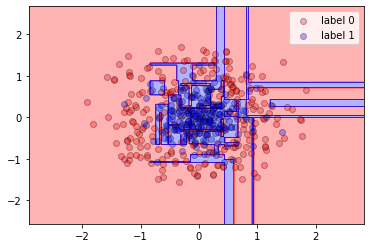

In [377]:
# visualize classification regions
plot_decision_regions(X, y, tree_clf) ## too complex (the tree has overfitted the data)

#### Max depth = 3

In [378]:
tree_clf = DecisionTreeClassifier(max_depth=3)
tree_clf.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=3)

In [379]:
y_train_pred = tree_clf.predict(X_train)
accuracy_score(y_train,y_train_pred)

0.784

In [380]:
y_test_pred = tree_clf.predict(X_test)
accuracy_score(y_test,y_test_pred)

0.704

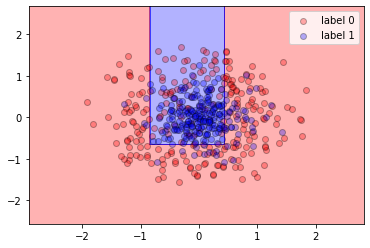

In [381]:
plot_decision_regions(X, y, tree_clf) # too simple 

### Random Forest:

In [382]:
from sklearn.ensemble import RandomForestClassifier
forest_clf = RandomForestClassifier(n_estimators=100, # number of trees
                                    max_depth = 3,  # max depth of the trees
                                    n_jobs = -1)  # use all your CPUs

In [383]:
forest_clf.fit(X_train,y_train)

RandomForestClassifier(max_depth=3, n_jobs=-1)

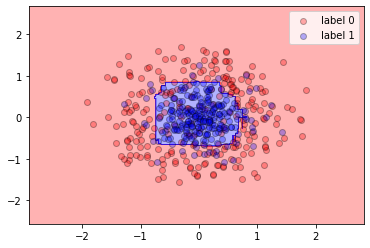

In [384]:
plot_decision_regions(X, y, forest_clf) # too simple